In [9]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy
import random

In [10]:
# generate 5x5 grid of spin either with -1 or 1 for ising model 
def generate_grid(N):
    return np.random.choice([-1,1],(N,N))


# calculate energy of the grid
def Hamiltonian_Monte_carlo(grid,temperature):
    count = 0
    length = len(grid[0]) # assuming quadratic grid
    rand_point_i = np.random.randint(1,length-1)
    rand_point_j = np.random.randint(1,length-1)
    random_point = grid[rand_point_i,rand_point_j]

    # calculate energy of the grid
    energy = -random_point*(grid[rand_point_i-1,rand_point_j] + grid[rand_point_i+1,rand_point_j] + grid[rand_point_i,rand_point_j-1] + grid[rand_point_i,rand_point_j+1])

    # flip spin according to Energy 
     
    if energy > 0:
        grid[rand_point_i,rand_point_j] = - random_point
        count += 1
    elif energy < 0:
        radius = np.random.uniform(0,1) #random num between [0,1)
        if radius < np.exp(4*energy/temperature):
            grid[rand_point_i,rand_point_j] = - random_point
            count += 1

    #print(grid)
    return grid, count

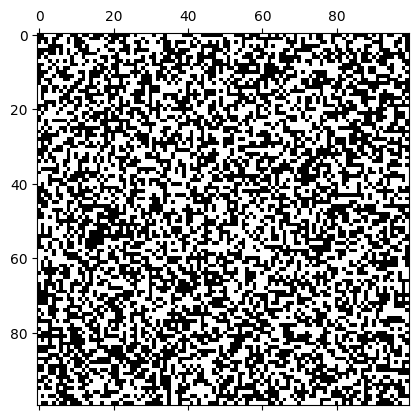

In [11]:
length_test = 100
grid_array = generate_grid(length_test)

#plot the grid, where 1 is white and -1 is black    
plt.matshow(grid_array,cmap='gray')

1848
2659
3196
3611
3994
4354
4671
4987
5310
5601
5978
6341
6694
6994
7289
7619
7952
8253
8531
8842


/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_96742/1281488797.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


9138
9416
9693
9967
10263
10543
10810
11062
11366
11643


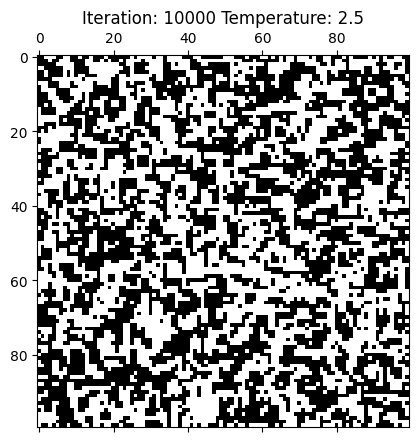

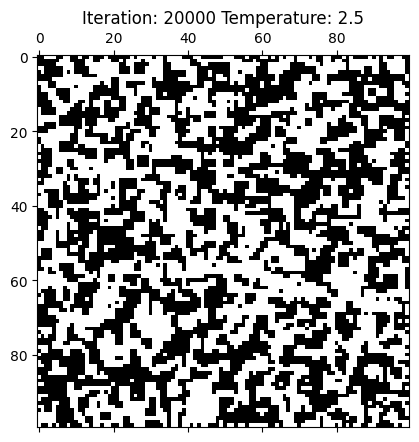

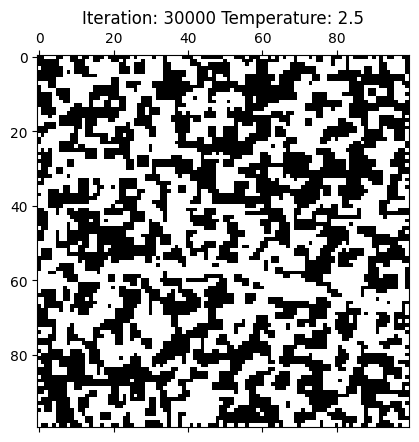

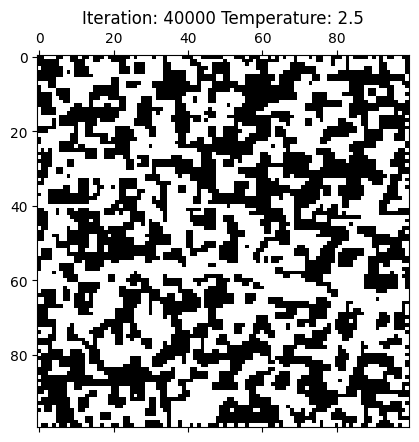

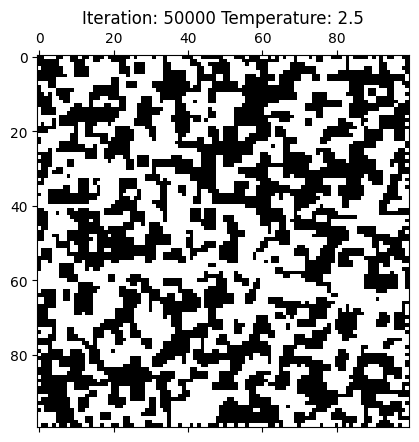

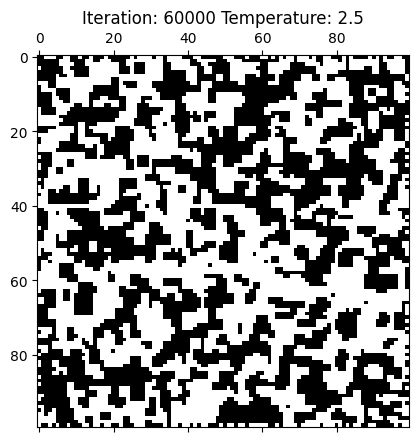

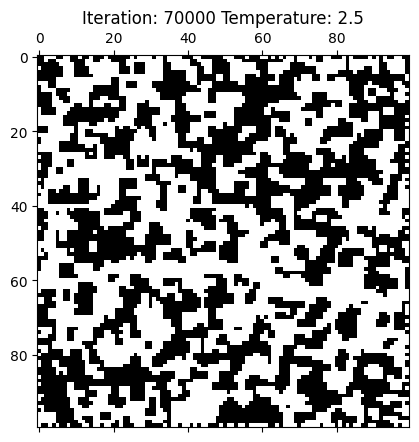

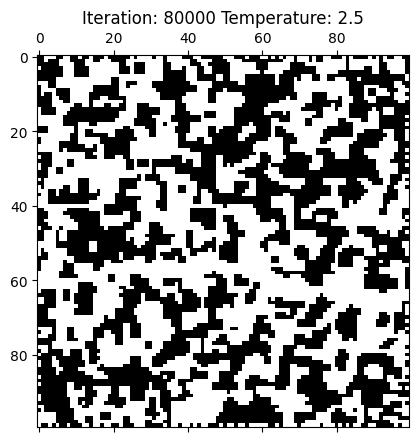

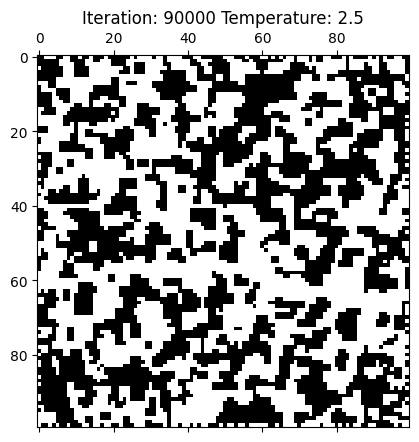

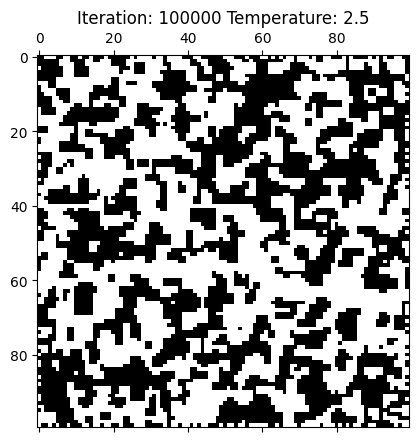

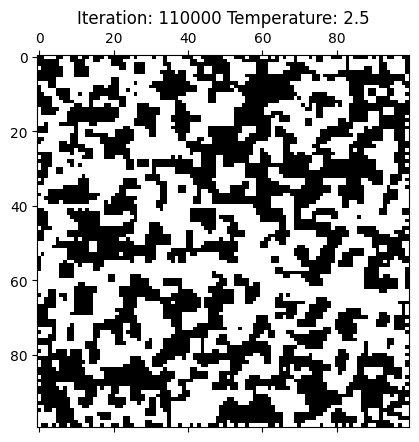

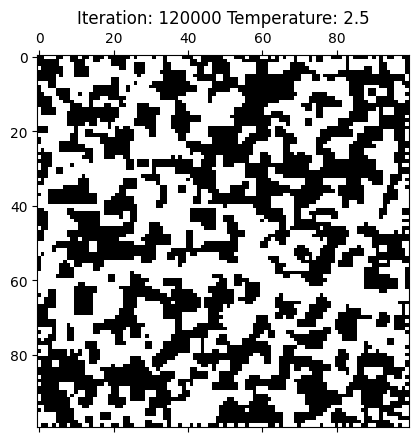

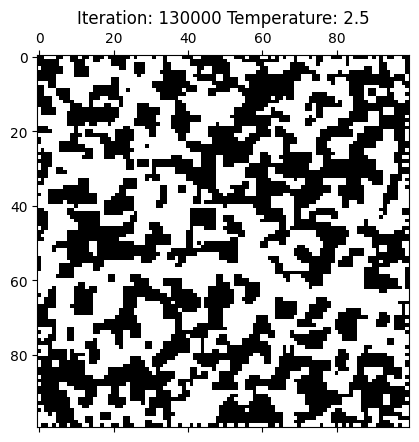

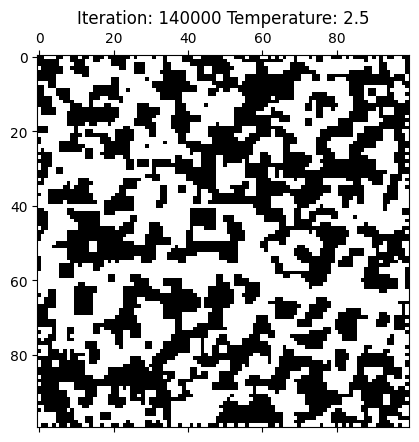

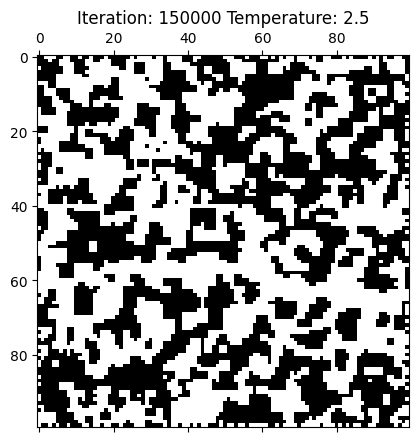

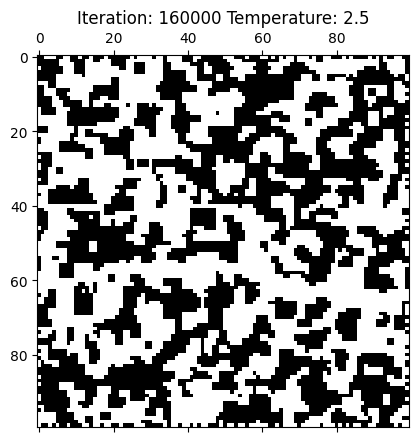

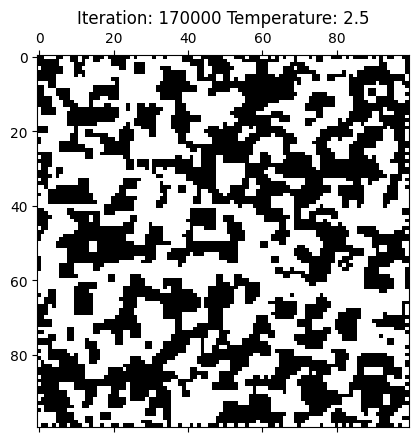

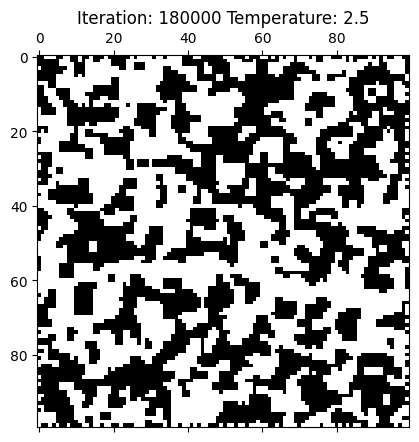

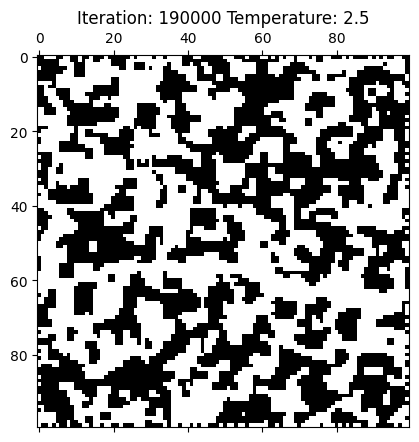

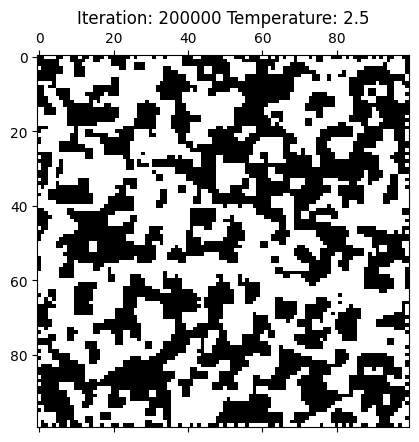

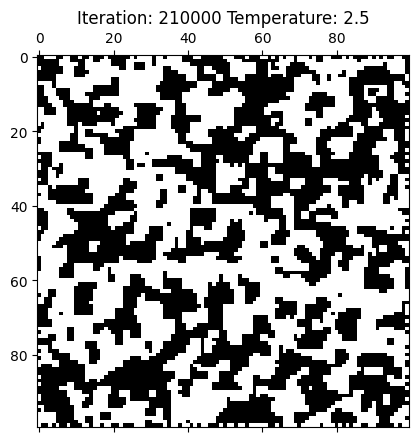

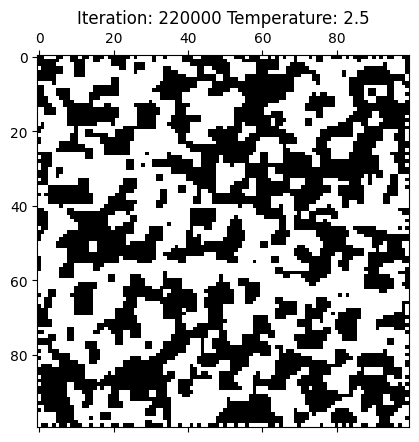

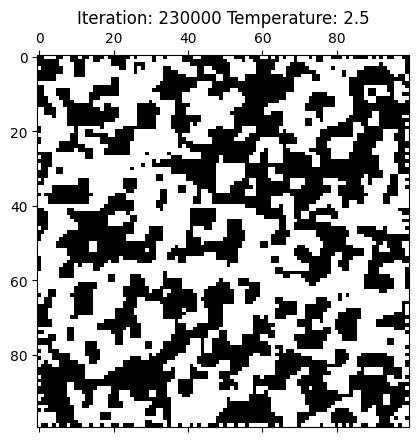

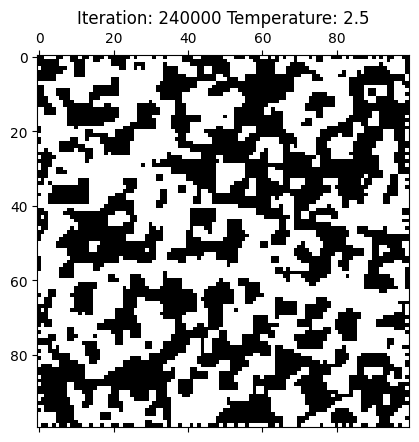

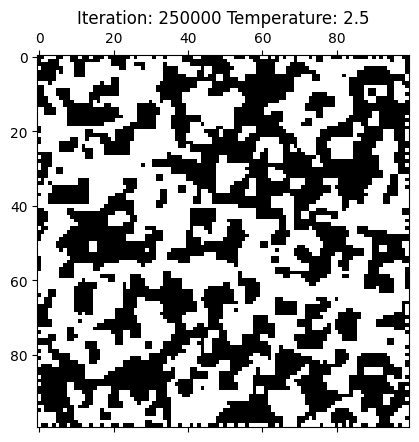

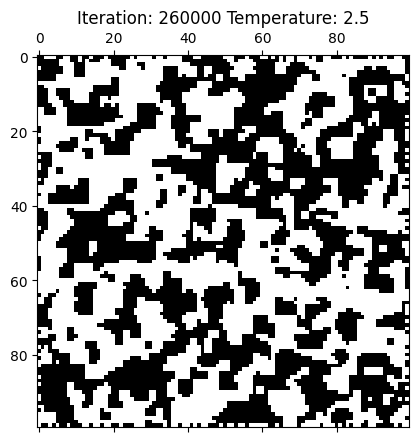

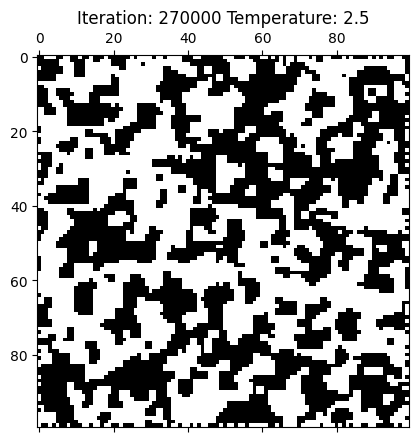

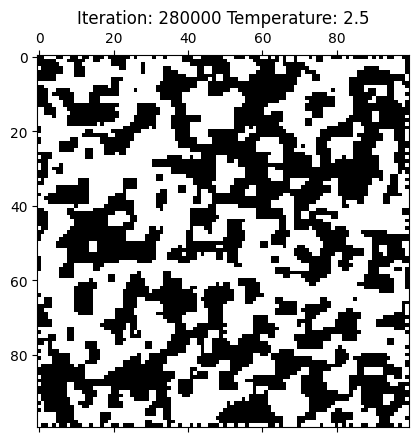

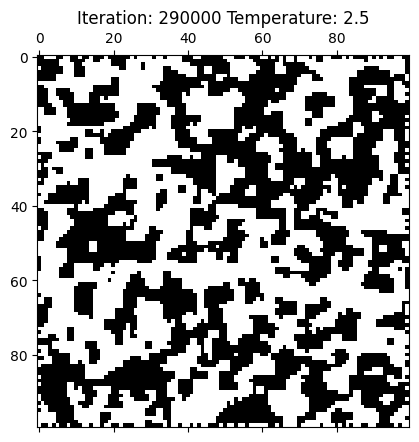

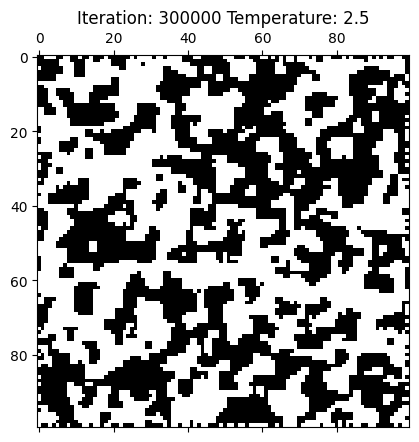

In [12]:
count_list = []
count_adding_up = 0
iteration_times = 30
iteration_length = 10000
temp = 2.5
for i in range(iteration_times):
    # save the grid after 1000 iterations
    for j in range(iteration_length):
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp)
        count_adding_up += count
    plt.matshow(grid_array,cmap='gray')
    plt.title('Iteration: '+str((i+1)*(j+1)) + ' Temperature: '+str(temp))
    plt.savefig('ising_model_'+str(i+1)+'.png')
    print(count_adding_up)
    count_list.append(count_adding_up)

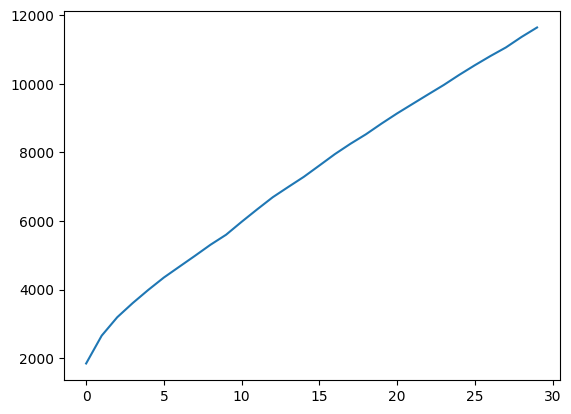

In [13]:
plt.plot(np.arange(iteration_times),count_list)

In [14]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

image_array = []

for i in range(iteration_times):
    image_array.append(Image.open('ising_model_'+str(i+1)+'.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.


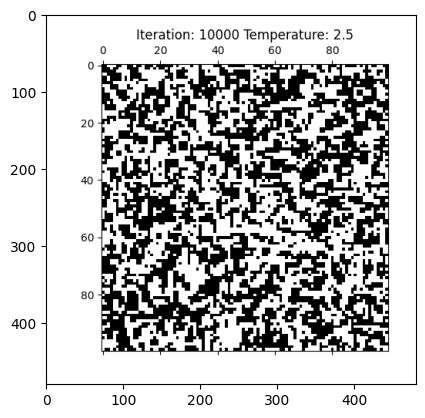

In [15]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('ising_model.gif')